## 一、导入文本文件夹

In [24]:
from zipfile import ZipFile
import os

zip_path = '17 chapters.zip'
extract_dir = '17_chapters'

with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
extracted_files = os.listdir(extract_dir)
extracted_files.sort()  # Sort files to maintain chapter order

## 二、对文本进行预处理

In [25]:
import os
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(document):
    tokens = tokenizer.tokenize(document.lower())
    filtered_tokens = [word for word in tokens if word not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    return lemmatized_tokens

texts = []
for file_name in sorted(os.listdir(extract_dir)):
    file_path = os.path.join(extract_dir, file_name)
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        processed_text = preprocess_text(text)
        texts.append(processed_text)

## 三、建立词汇-文档矩阵

In [28]:
texts

[['town',
  'heart',
  'america',
  'life',
  'seemed',
  'live',
  'harmony',
  'surroundings',
  'e',
  'town',
  'lay',
  'midst',
  'checkerboard',
  'prosperous',
  'farm',
  'field',
  'grain',
  'hillside',
  'orchard',
  'spring',
  'white',
  'cloud',
  'bloom',
  'drifted',
  'green',
  'field',
  'autumn',
  'oak',
  'maple',
  'birch',
  'set',
  'blaze',
  'color',
  'flamed',
  'flickered',
  'across',
  'backdrop',
  'pine',
  'en',
  'fox',
  'barked',
  'hill',
  'deer',
  'silently',
  'crossed',
  'field',
  'half',
  'hidden',
  'mist',
  'fall',
  'morning',
  'along',
  'road',
  'laurel',
  'viburnum',
  'alder',
  'great',
  'fern',
  'wildflower',
  'delighted',
  'traveler',
  'eye',
  'much',
  'year',
  'even',
  'winter',
  'roadside',
  'place',
  'beauty',
  'countless',
  'bird',
  'came',
  'feed',
  'berry',
  'seed',
  'head',
  'dried',
  'weed',
  'rising',
  'snow',
  'e',
  'countryside',
  'fact',
  'famous',
  'abundance',
  'variety',
  'bird',

In [26]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [29]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 2),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 2),
  (10, 3),
  (11, 5),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 2),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 5),
  (31, 1),
  (32, 1),
  (33, 2),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 2),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 3),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 2),
  (59, 1),
  (60, 2),
  (61, 1),
  (62, 1),
  (63, 2),
  (64, 2),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 2),
  (69, 1),
  (70, 2),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 10),
  (81, 2),
  (82, 1),
  (83, 1),
  (84, 2),
  (85, 1),
  (86, 2),
  (87, 1),
  (88, 3),
  (89, 1),
  (90, 1),
  (91, 1

## 四、通过计算主题一致性获取最佳主题数目

In [37]:

from gensim import models
import pyLDAvis.gensim_models


# 尝试的主题数范围
min_topics = 1
max_topics = 10

best_coherence = 0
best_model = None
best_num_topics = 0

coherence_scores = []

for num_topics in range(min_topics, max_topics + 1):
    # 训练LDA模型
    model = models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=10, workers=2,random_state=100)
    
    # 计算一致性分数
    coherence_model = models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append((num_topics, coherence_score))
    
    if coherence_score > best_coherence:
        best_coherence = coherence_score
        best_model = model
        best_num_topics = num_topics

# 打印每个主题数的一致性分数
for num_topics, score in coherence_scores:
    print(f"Num Topics: {num_topics}, Coherence Score: {score:.4f}")

Num Topics: 1, Coherence Score: 0.2525
Num Topics: 2, Coherence Score: 0.2308
Num Topics: 3, Coherence Score: 0.2473
Num Topics: 4, Coherence Score: 0.3170
Num Topics: 5, Coherence Score: 0.2961
Num Topics: 6, Coherence Score: 0.2839
Num Topics: 7, Coherence Score: 0.2660
Num Topics: 8, Coherence Score: 0.3064
Num Topics: 9, Coherence Score: 0.2779
Num Topics: 10, Coherence Score: 0.2888


Best Model: 4 topics, Coherence Score: 0.3170


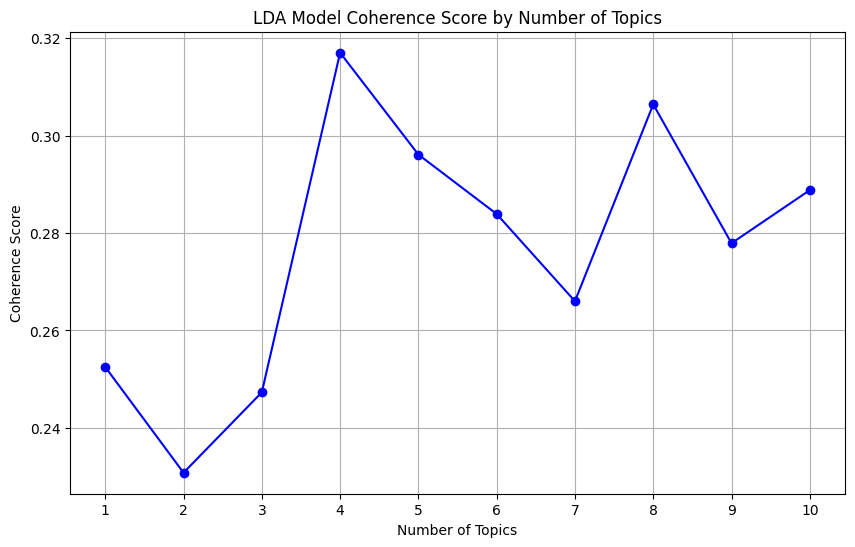

In [45]:
# 打印最佳模型的信息
print(f"Best Model: {best_num_topics} topics, Coherence Score: {best_coherence:.4f}")
import matplotlib.pyplot as plt

coherence_scores = [
    (1, 0.2525),
    (2, 0.2308),
    (3, 0.2473),
    (4, 0.3170),
    (5, 0.2961),
    (6, 0.2839),
    (7, 0.2660),
    (8, 0.3064),
    (9, 0.2779),
    (10, 0.2888)
]

# 解包主题数和对应的一致性分数
num_topics, scores = zip(*coherence_scores)

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(num_topics, scores, marker='o', linestyle='-', color='b')
plt.title('LDA Model Coherence Score by Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(num_topics)
plt.grid(True)
plt.show()

# 可视化最佳模型
vis = pyLDAvis.gensim_models.prepare(best_model, corpus, dictionary)
pyLDAvis.save_html(vis, 'lda_best_model_visualization.html')

## 六、主题建模

In [41]:
from gensim import models

# 假设 corpus 和 dictionary 已经根据您的数据准备好
# 设置最佳主题数
best_num_topics = 4

# 使用最佳主题数训练LDA模型
best_lda_model = models.LdaMulticore(corpus, num_topics=best_num_topics, id2word=dictionary, passes=10, workers=2, random_state=100)

# 打印出所有主题
topics = best_lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.014*"e" + 0.011*"chemical" + 0.007*"insect" + 0.006*"cell" + 0.006*"one" + 0.006*"may" + 0.005*"cancer" + 0.005*"water" + 0.004*"insecticide" + 0.004*"control"')
(1, '0.010*"chemical" + 0.008*"insecticide" + 0.007*"e" + 0.007*"may" + 0.006*"one" + 0.006*"ddt" + 0.006*"food" + 0.005*"use" + 0.005*"residue" + 0.004*"part"')
(2, '0.012*"soil" + 0.010*"e" + 0.009*"insect" + 0.008*"resistance" + 0.007*"chemical" + 0.007*"year" + 0.006*"ddt" + 0.006*"control" + 0.005*"insecticide" + 0.004*"may"')
(3, '0.014*"e" + 0.008*"bird" + 0.007*"spraying" + 0.007*"fish" + 0.006*"one" + 0.006*"year" + 0.005*"chemical" + 0.005*"area" + 0.005*"state" + 0.005*"insect"')
